<a href="https://colab.research.google.com/github/JoaoDaross/Python_Investimentos/blob/master/Investimentos_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importando bibliotecas

In [ ]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
#import pandas_datareader.data as web
#yf.pdr_override()

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para corrgir o bug: AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'
!pip install git+https://github.com/quantopian/pyfolio

import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')

# 2. Obtendo e tratando os dados

In [3]:
#tickers = ["ABEV3.SA", "ITSA4.SA", "WEGE3.SA", "USIM5.SA", "VALE3.SA", '^BVSP']
#dados_yahoo = web.get_data_yahoo(tickers, period="5y")["Adj Close"]

tickers = "ABEV3.SA ITSA4.SA WEGE3.SA USIM5.SA VALE3.SA ^BVSP"
dados_yahoo = yf.download(tickers=tickers, period="5y")['Adj Close']


[*********************100%***********************]  6 of 6 completed


In [4]:
dados_yahoo

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2015-10-02,17.614170,4.372668,3.065049,14.944030,11.374210,47033.0
2015-10-05,17.868811,4.472848,3.200842,15.212384,11.652656,47598.0
2015-10-06,17.464895,4.537673,3.220241,15.354949,11.624875,47735.0
2015-10-07,17.561485,4.679111,3.288138,16.897991,11.722245,48914.0
2015-10-08,17.280500,4.696787,3.559724,16.822519,11.311588,49107.0
...,...,...,...,...,...,...
2020-09-28,12.480000,8.970000,10.140000,58.779999,62.889999,94666.0
2020-09-29,12.350000,8.820000,9.850000,58.349998,64.940002,93580.0
2020-09-30,12.540000,8.800000,10.030000,59.110001,65.699997,94603.0


In [5]:
retorno = dados_yahoo.pct_change()
retorno

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2015-10-02,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-05,0.014457,0.022911,0.044304,0.017957,0.024480,0.012013
2015-10-06,-0.022604,0.014493,0.006061,0.009372,-0.002384,0.002878
2015-10-07,0.005531,0.031170,0.021084,0.100492,0.008376,0.024699
2015-10-08,-0.016000,0.003778,0.082596,-0.004466,-0.035032,0.003946
...,...,...,...,...,...,...
2020-09-28,-0.028037,-0.005543,-0.012658,-0.007933,-0.020642,-0.024052
2020-09-29,-0.010417,-0.016722,-0.028600,-0.007315,0.032597,-0.011472
2020-09-30,0.015385,-0.002268,0.018274,0.013025,0.011703,0.010932


In [6]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2015-10-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-10-05,1.014457,1.022911,1.044304,1.017957,1.024480,1.012013
2015-10-06,0.991525,1.037735,1.050633,1.027497,1.022038,1.014926
2015-10-07,0.997009,1.070081,1.072785,1.130752,1.030599,1.039993
2015-10-08,0.981057,1.074124,1.161392,1.125702,0.994494,1.044097
...,...,...,...,...,...,...
2020-09-28,0.708520,2.051379,3.308267,3.933343,5.529175,2.012757
2020-09-29,0.701140,2.017075,3.213652,3.904569,5.709408,1.989667
2020-09-30,0.711927,2.012501,3.272379,3.955426,5.776225,2.011418


In [7]:
carteira = 10000 * retorno_acumulado.iloc[:, :5]
carteira["saldo"] = carteira.sum(axis=1)
carteira["retorno"] = carteira["saldo"].pct_change()
carteira

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,saldo,retorno
Date,,,,,,,
2015-10-02,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000,NaN
2015-10-05,10144.565755,10229.105329,10443.036911,10179.572993,10244.804022,51241.085009,0.024822
2015-10-06,9915.252989,10377.354828,10506.327676,10274.972143,10220.379880,51294.287516,0.001038
2015-10-07,9970.089545,10700.814131,10727.848077,11307.519724,10305.985952,53012.257428,0.033492
2015-10-08,9810.567480,10741.239864,11613.923455,11257.016694,9944.943809,53367.691302,0.006705
...,...,...,...,...,...,...,...
2020-09-28,7085.204406,20513.793178,33082.672915,39333.432504,55291.749855,155306.852859,-0.014110
2020-09-29,7011.400667,20170.751860,32136.521677,39045.691974,57094.075456,155458.441635,0.000976
2020-09-30,7119.268128,20125.014326,32723.785924,39554.257700,57762.248879,157284.574958,0.011747


## 3. Resultados

Start date,2015-10-02
End date,2020-10-02
Total months,59
,Backtest
Annual return,26.276%
Cumulative returns,216.358%
Annual volatility,31.324%
Sharpe ratio,0.90
Calmar ratio,0.66
Stability,0.85
Max drawdown,-39.657%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,39.66,2020-01-23,2020-03-23,2020-07-20,128
1,37.12,2015-10-09,2016-01-18,2016-07-28,210
2,23.63,2018-02-26,2018-06-21,2019-07-08,356
3,16.20,2017-02-21,2017-04-13,2017-08-07,120
4,15.01,2019-07-10,2019-08-26,2019-11-22,98


Stress Events,mean,min,max
New Normal,0.11%,-13.81%,12.24%


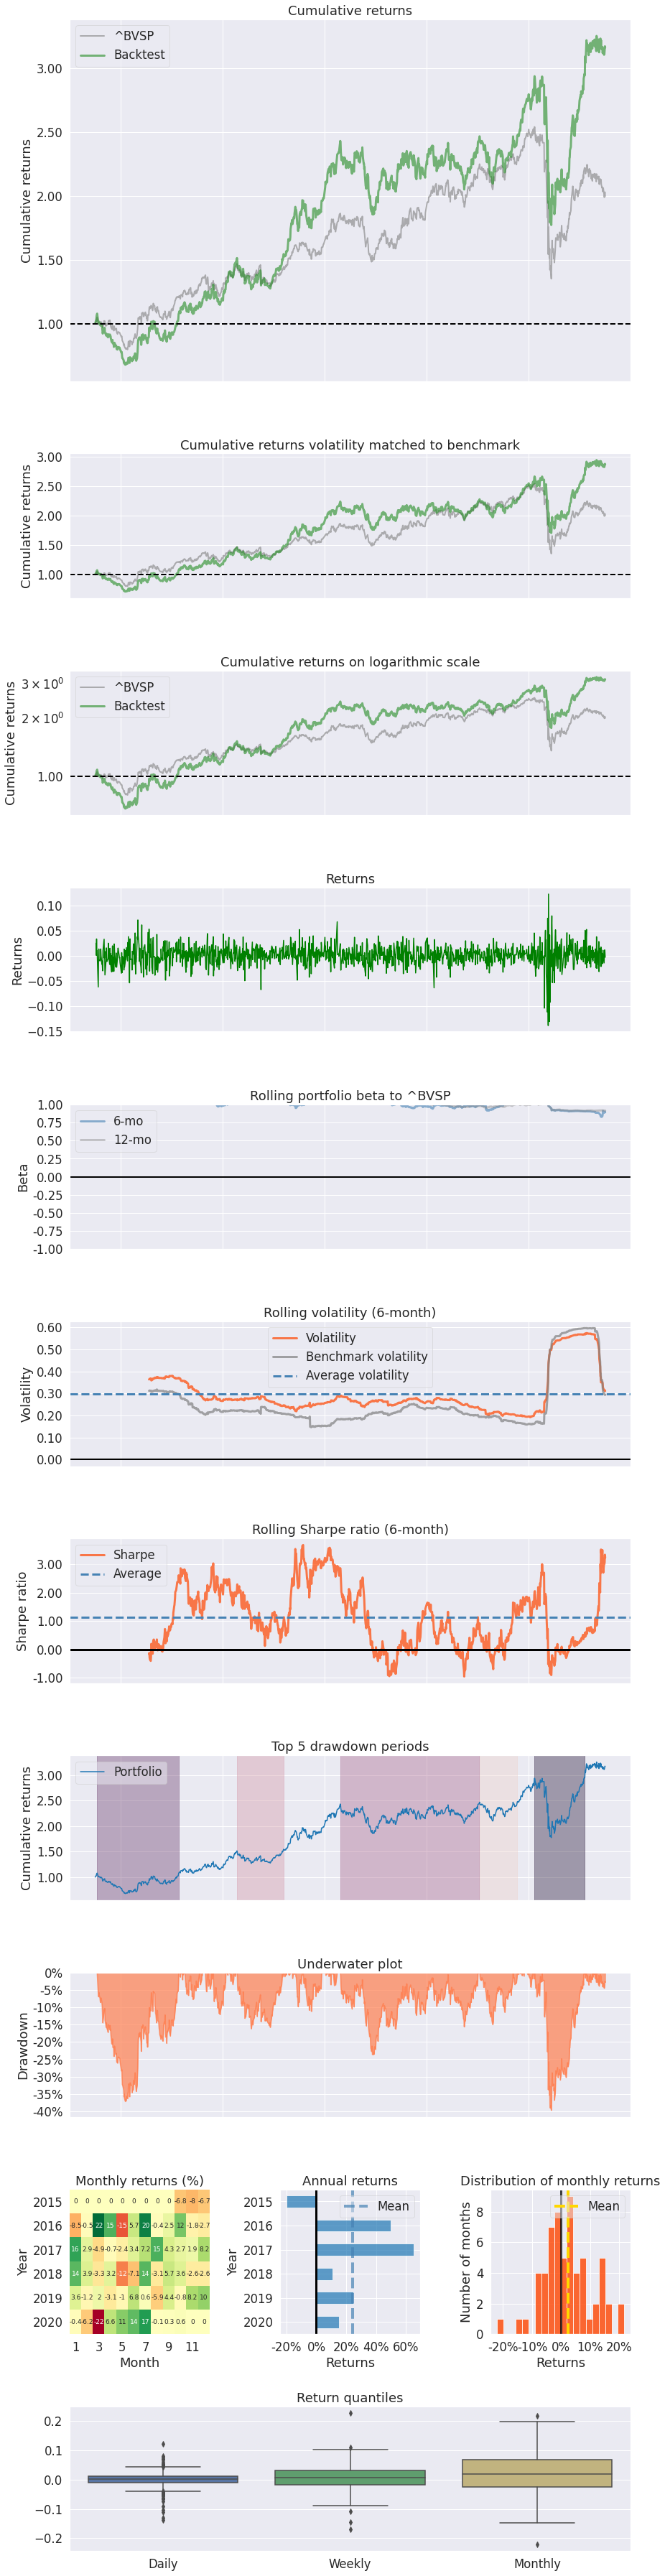

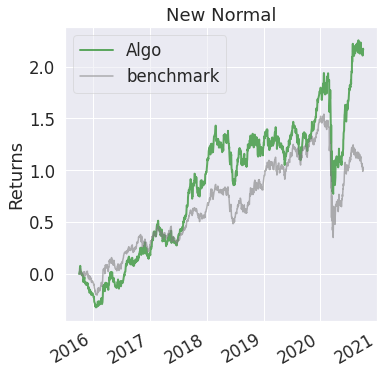

In [8]:
pf.create_full_tear_sheet(carteira["retorno"], benchmark_rets=retorno["^BVSP"])

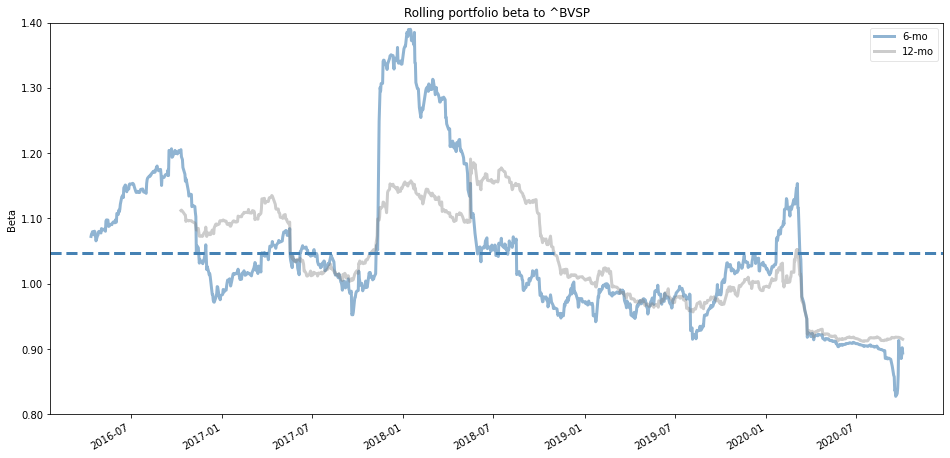

In [9]:
fig, ax1 = plt.subplots(figsize=(16,8))
pf.plot_rolling_beta(carteira["retorno"], factor_returns=retorno["^BVSP"], ax=ax1)
plt.ylim((0.8, 1.4));